### **This file contains:**


---


1. **Loading `leader_df` CSV file that has leader info for each community**
2. **Running different BERT models trained on the SST-2 dataset to perform sentiment analysis**
3. **Storing each model's result graph and prediction dataset** **bold text**


In [ ]:
# !pip install tensorflow
# !pip install wordcloud
# !pip install pycountry
# !pip install langdetect
# !pip install prettytable

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow import keras
import itertools
from itertools import combinations
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
from collections import Counter
import nltk
from nltk.corpus import stopwords, words as nltk_words
from nltk.tokenize import word_tokenize
# from wordcloud import WordCloud
import matplotlib.cm as cm
import re
from nltk.stem import WordNetLemmatizer
import heapq
from tqdm import tqdm

# import pycountry
# from langdetect import detect
# from prettytable import PrettyTable

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# LOAD DATA FILES AND COMBINE

In [ ]:


#Temp lab
leader_df = pd.read_csv('C:/Users/21301610/Downloads/code/leader_df.csv')



In [ ]:
pip install transformers datasets torch


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install transformers

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline



# Load the pre-trained model and tokenizer for sentiment analysis
model_name = "distilbert-base-uncased-finetuned-sst-2-english"  # Distilled BERT
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create a sentiment analysis pipeline
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Apply the sentiment analysis model to the 'Tweet Content' column
leader_df['Sentiment'] = leader_df['Tweet Content'].apply(lambda x: sentiment_analysis(x)[0]['label'])

leader_df.head(10)
leader_df.to_csv('leader_distilled_bert.csv', index=False)

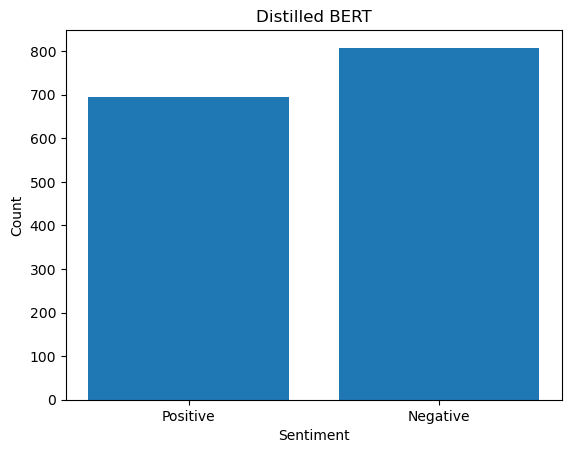

In [ ]:
# prompt: Plot a graph where x axis has positive and negative and y axis has their counts for the column "sentiment" of leader_df

import matplotlib.pyplot as plt

sentiment_counts = leader_df['Sentiment'].value_counts()

x_values = ['Positive', 'Negative']
y_values = [sentiment_counts['POSITIVE'], sentiment_counts['NEGATIVE']]

plt.bar(x_values, y_values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distilled BERT')
plt.show()


In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline



# Load the pre-trained model and tokenizer for sentiment analysis
model_name = "textattack/bert-base-uncased-SST-2"  # BERT-based model fine-tuned on SST-2
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create a sentiment analysis pipeline
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Apply the sentiment analysis model to the 'Tweet Content' column
leader_df['Sentiment'] = leader_df['Tweet Content'].apply(lambda x: sentiment_analysis(x)[0]['label'])

leader_df.head(10)
leader_df.to_csv('leader_bert.csv', index=False)

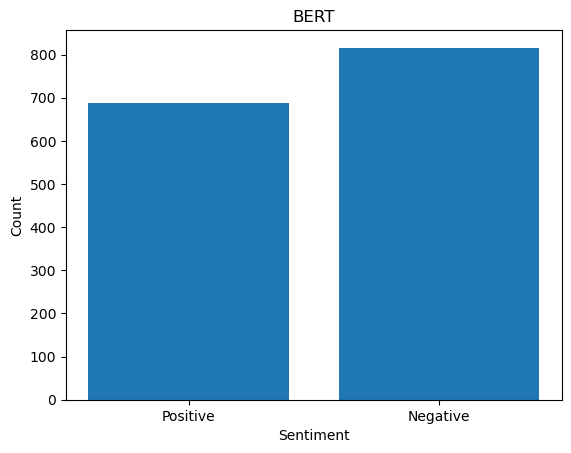

In [ ]:
# prompt: Plot a graph where x axis has positive and negative and y axis has their counts for the column "sentiment" of leader_df

import matplotlib.pyplot as plt

sentiment_counts = leader_df['Sentiment'].value_counts()

x_values = ['Positive', 'Negative']
y_values = [sentiment_counts['LABEL_1'], sentiment_counts['LABEL_0']]

plt.bar(x_values, y_values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('BERT')
plt.show()


In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline



# Load the pre-trained model and tokenizer for sentiment analysis
model_name = "textattack/albert-base-v2-SST-2"  # ALBERT (A Lite BERT
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create a sentiment analysis pipeline
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Apply the sentiment analysis model to the 'Tweet Content' column
leader_df['Sentiment'] = leader_df['Tweet Content'].apply(lambda x: sentiment_analysis(x)[0]['label'])

leader_df.head(10)

leader_df.to_csv('leader_albert.csv', index=False)


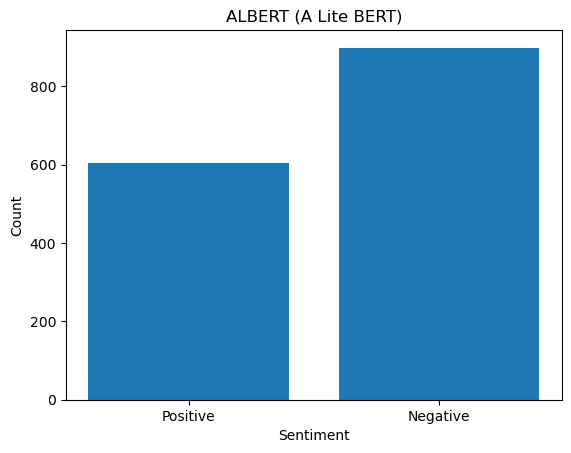

In [ ]:
# prompt: Plot a graph where x axis has positive and negative and y axis has their counts for the column "sentiment" of leader_df

import matplotlib.pyplot as plt

sentiment_counts = leader_df['Sentiment'].value_counts()

x_values = ['Positive', 'Negative']
y_values = [sentiment_counts['LABEL_1'], sentiment_counts['LABEL_0']]

plt.bar(x_values, y_values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('ALBERT (A Lite BERT)')
plt.show()


In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline



# Load the pre-trained model and tokenizer for sentiment analysis
model_name = "textattack/roberta-base-SST-2"  #RoBERTa (Robustly optimized BERT approach)
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create a sentiment analysis pipeline
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Apply the sentiment analysis model to the 'Tweet Content' column
leader_df['Sentiment'] = leader_df['Tweet Content'].apply(lambda x: sentiment_analysis(x)[0]['label'])

leader_df.head(10)


Some weights of the model checkpoint at textattack/roberta-base-SST-2 were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


,Username,Tweet Content,Sentiment
0,cryptosavingexp,"""#ethereum price update: $1421.34 usd 0.073224...",LABEL_0
1,puritylekutit,"""@janwues do not fear bear markets.they lead t...",LABEL_1
2,prymxpe,"""@janwues do not fear bear markets.they lead t...",LABEL_1
3,garygensler,"""@janwues do not fear bear markets.they lead t...",LABEL_1
4,minerstarmst,"""@janwues do not fear bear markets.they lead t...",LABEL_1
5,you97953679,"""@botarena_nft i respectfully believe that not...",LABEL_0
6,binance,"""@botarena_nft i respectfully believe that not...",LABEL_0
7,cryptolottodao,"""@botarena_nft i respectfully believe that not...",LABEL_0
8,Adnan25572221,"""@betllerofficial i respectfully believe that ...",LABEL_0
9,"""@airdropstario","""@betllerofficial i respectfully believe that ...",LABEL_0


In [ ]:
#leader_df.to_csv('leader_roberta.csv', index=False)


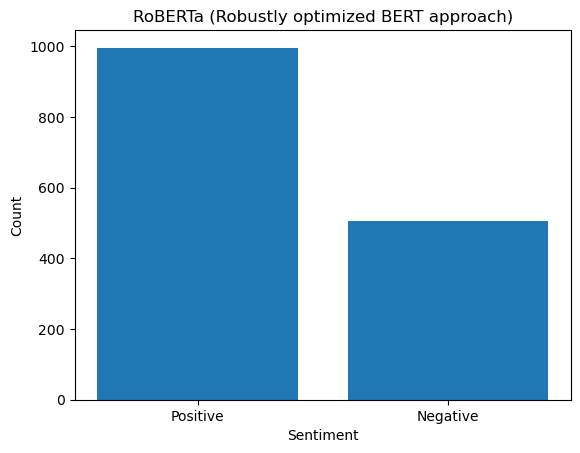

In [ ]:
# prompt: Plot a graph where x axis has positive and negative and y axis has their counts for the column "sentiment" of leader_df

import matplotlib.pyplot as plt

sentiment_counts = leader_df['Sentiment'].value_counts()

x_values = ['Positive', 'Negative']
y_values = [sentiment_counts['LABEL_1'], sentiment_counts['LABEL_0']]

plt.bar(x_values, y_values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('RoBERTa (Robustly optimized BERT approach)')
plt.show()
